# Lab 03: Resizing and slicing in PyTorch -- solution

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # find automatically the path of the folder containing "file_name" :
    file_name = 'pytorch_tensor_part2_solution.ipynb'
    import subprocess
    path_to_file = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
    path_to_file = path_to_file.replace(file_name,"").replace('\n',"")
    # if previous search failed or too long, comment the previous line and simply write down manually the path below :
    #path_to_file = '/content/gdrive/My Drive/CS5242_2021_codes/codes/labs_lecture02/lab03_pytorch_tensor2'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [2]:
import torch
import utils

### Make a 10 x 2 matrix random matrix A. Then store its third row (index = 2) into a vector v. Then store the first 5 rows (index 0 to index 4)  into a submatrix B. The important information is that B has a total of five rows. Print A, v and B.

In [4]:
A=torch.rand(10,2)

v= A[2]

B= A[0:5]

print(A)
print("")
print(v)
print("")
print(B)

tensor([[0.4969, 0.1567],
        [0.8470, 0.3018],
        [0.5666, 0.5087],
        [0.4240, 0.3647],
        [0.8495, 0.8713],
        [0.8523, 0.8104],
        [0.8663, 0.4866],
        [0.5194, 0.2578],
        [0.8656, 0.1497],
        [0.7833, 0.8181]])

tensor([0.5666, 0.5087])

tensor([[0.4969, 0.1567],
        [0.8470, 0.3018],
        [0.5666, 0.5087],
        [0.4240, 0.3647],
        [0.8495, 0.8713]])


### Extract entry (0,0) of the matrix A and store it into a PYTHON NUMBER x

In [5]:
x=A[0,0]
print(x)

tensor(0.4969)


### Let's download 60,000 gray scale pictures as well as their label. Each picture is 28 by 28 pixels.

In [6]:
from utils import check_mnist_dataset_exists
data_path=check_mnist_dataset_exists()

data=torch.load(data_path+'mnist/train_data.pt')
label=torch.load(data_path+'mnist/train_label.pt')

MNIST dataset missing - downloading...



Extracting ../../data/mnist/temp/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/mnist/temp/MNIST/raw



Extracting ../../data/mnist/temp/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/mnist/temp/MNIST/raw



Extracting ../../data/mnist/temp/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/mnist/temp/MNIST/raw



Extracting ../../data/mnist/temp/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/mnist/temp/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Find the sizes of these two tensors

In [9]:
print(data.size())
print(data.dim())
print(label.size())
print(label.dim())

torch.Size([60000, 28, 28])
3
torch.Size([60000])
1


### Print the first picture by slicing the data tensor. You will see the intensity of each pixel (a value between 0 and 1)

In [11]:
print(data[0])

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

### The function show() from the "utils" package will display the picture:

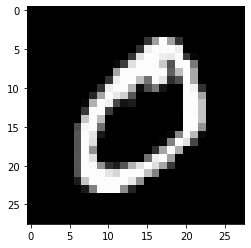

In [14]:
utils.show(data[1])

### Print the first entry of the label vector. The label is 5 telling you that this is the picture of a five.

In [15]:
print( label[0] )

tensor(5)


### Display picture 20 of the dataset and print its label

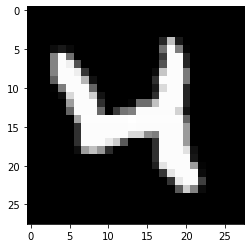

tensor(4)


In [16]:
utils.show(data[20])
print(label[20])

### Print the label corresponding to picture 10,000  10,001 10,002  10,003 and 10,004. So you need to extract 5 entries starting from entry 10,000.

In [17]:
print(label[10000:10000+5])

tensor([3, 8, 7, 9, 9])


### Display the two pictures that have label 9

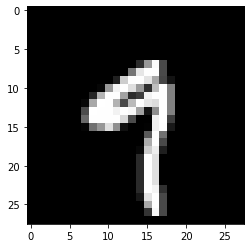

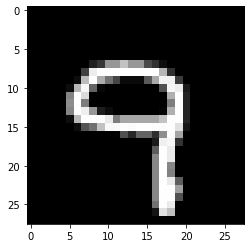

In [18]:
utils.show(data[10003])
utils.show(data[10004])

### Lets now play with the CIFAR data set. These are RGB pictures

In [19]:
from utils import check_cifar_dataset_exists
data_path=check_cifar_dataset_exists()

data=torch.load(data_path+'cifar/train_data.pt')
label=torch.load(data_path+'cifar/train_label.pt')

CIFAR dataset missing - downloading...



Extracting ../../data/cifar/temp/cifar-10-python.tar.gz to ../../data/cifar/temp
Files already downloaded and verified


### Find the size of these two tensors. How many pictures? How many pixels? Note that it is a 4-dimensional Tensor. Dimension 0 gives you the index of the picture, dimension 1 gives you the chanel (R, G or B) and the last two dimension gives you the pixel location.

In [28]:
print(data.size())
print(label.size())

torch.Size([50000, 3, 32, 32])
torch.Size([50000])


### Extract the first picture (a 3 x 32 x 32 Tensor) and check its size.

In [14]:
data[0].size()

torch.Size([3, 32, 32])

### Display picture 7, 40 and 100 of the data set with utils.show() and print its label. For CIFAR, the label are:
0) Airplane  
1) Automobile   
2) Bird   
3) Cat   
4) Deer   
5) Dog    
6) Frog  
7) Horse   
8) Ship    
9) Truck

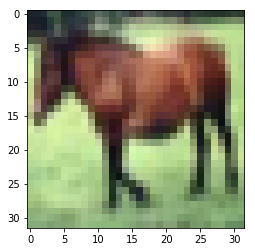

tensor(7)


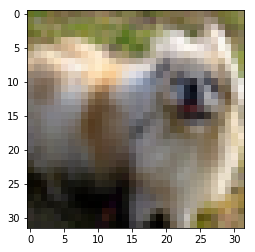

tensor(5)


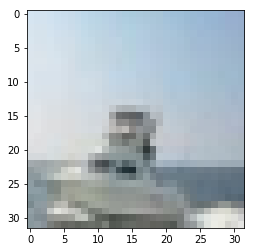

tensor(8)


In [15]:
utils.show(data[7])
print(label[7])
utils.show(data[40])
print(label[40])
utils.show(data[100])
print(label[100])